#  PRONOSTICOS Y PREDICCIONES GIMNASIOS MODEL FITNESS

## Paso 1. Cargar datos

In [1]:
# 1.1 Importar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans


## 1.1 Exploracion de datos

In [2]:
# 1.2 Cargar dataset

gym_data= pd.read_csv(r"C:\Users\yesse\OneDrive\Documentos\PROYECTOS ANALISIS DE DATOS\GIMNASIO MODEL FITNESS\Data\gym_churn_us.csv")

In [3]:
gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
gym_data.duplicated().sum()

np.int64(0)

In [8]:
gym_data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

### Conclusión 

En esta primera parte del análisis revisé la calidad del dataset. El archivo está completo, no presenta valores nulos ni filas duplicadas, lo cual significa que los datos están limpios y listos para trabajar sin necesidad de hacer correcciones o depuraciones adicionales.
En total contamos con 4000 registros de clientes y 14 variables que incluyen información personal, datos de sus contratos, frecuencia de visitas, uso de servicios adicionales y la variable objetivo que indica si el cliente canceló o no su membresía.

Esto me da la tranquilidad de que puedo avanzar directamente al análisis exploratorio (EDA) con confianza, ya que no hay problemas de calidad de datos que afecten el estudio.

## Paso 2. Llevar a cabo el análisis exploratorio de datos (EDA)

### *2.1 Observación dataset*

In [9]:
# 2.2.1 Vista rapida de las  filas

gym_data.shape
gym_data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [10]:
# 2.1.2 Información general de las columnas y tipos de datos

gym_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [11]:
# 2.1.3 Comprobar valores nulos 
gym_data.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [12]:
# 2.1.4 Comprobar valores duplicados

print("Valores duplicados:")
print(gym_data.duplicated().sum())


Valores duplicados:
0


In [13]:
# 2.1.5 Vista general con describe() para numéricas 

desc_numeric = gym_data.describe().T  
display(desc_numeric)

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [14]:
# 2.1.6 Armamos una tabla con mean y std para TODAS las columnas
stats_mean_std = pd.DataFrame({
    "mean": gym_data.mean(numeric_only=True),
    "std": gym_data.std(numeric_only=True)
}).round(6)

print("Media y desviación estándar por variable:")
display(stats_mean_std)

Media y desviación estándar por variable:


,mean,std
gender,0.510250,0.499957
Near_Location,0.845250,0.361711
Partner,0.486750,0.499887
Promo_friends,0.308500,0.461932
Phone,0.903500,0.295313
Contract_period,4.681250,4.549706
Group_visits,0.412250,0.492301
Age,29.184250,3.258367
Avg_additional_charges_total,146.943728,96.355602
Month_to_end_contract,4.322750,4.191297


#### Conclusión

El dataset está completo y consistente, asi que puedo trabajar con confianza. Las medias y desviaciones revelan un panorama heterogéneo: conviven clientes con contratos y antigüedades muy diferentes, niveles de uso del gimnasio bastante variados y gastos adicionales dispares. En conjunto, esto sugiere que habrá patrones claros de permanencia y cancelación vinculados al compromiso (frecuencia de uso) y al tipo de contrato. Con una base de datos limpia y diversa, tenemos el terreno ideal para que el EDA y los modelos capturen esas diferencias y me ayuden a explicar el churn.

### *2.2 Comparar valores promedio entre clientes que se quedaron vs. cancelaron*

In [15]:
# Se agrupa por churn y se calculan las medidas

churn_means= gym_data.groupby('Churn').mean()
print("Promedio variable segun Churn:")
display(churn_means.T)


Promedio variable segun Churn:


Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


#### Conclusión

En este análisis comparé a los clientes que permanecieron en el gimnasio con aquellos que cancelaron.
Los resultados muestran que hay diferencias claras entre ambos grupos:

No hay diferencias relevantes en género ni en haber dejado teléfono, por lo que estas variables no parecen influir en la cancelación.

* Sí hay factores clave que impactan en la permanencia:
* Vivir o trabajar cerca del gimnasio.
* Pertenecer a una empresa asociada.
* Haber ingresado con una promoción de amigo.
* Participar en clases grupales.

El tipo de contrato y la antigüedad son determinantes: los contratos cortos y los clientes nuevos se van mucho más rápido.

La frecuencia de visitas y el consumo de servicios adicionales son indicadores fuertes de retención: los clientes que asisten más seguido y gastan más en extras son los que se quedan.

En resumen, los clientes que se van suelen ser jóvenes, nuevos, con contratos cortos, baja frecuencia de visitas y poca vinculación social o económica con el gimnasio.
Por el contrario, los que permanecen muestran más compromiso, ya sea por contratos largos, más asistencia, participación en grupos o conexión con promociones y convenios.

In [16]:
# Conteo de clientes en cada grupo
print("\nCantidad de clientes por grupo:")
gym_data['Churn'].value_counts(normalize=True) * 100


Cantidad de clientes por grupo:


Churn
0    73.475
1    26.525
Name: proportion, dtype: float64

Esto significa que, de cada 100 clientes:
~74 se quedan,
~27 se van.

Una tasa de cancelación del 26.5% es significativa: no es minoritaria, por lo que trabajar en estrategias de retención es clave para mejorar la estabilidad de ingresos del gimnasio.

### *2.3 Histogramas de barras y distribuciones de características.*

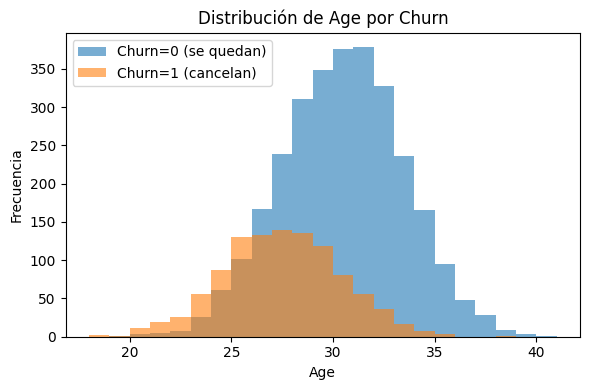

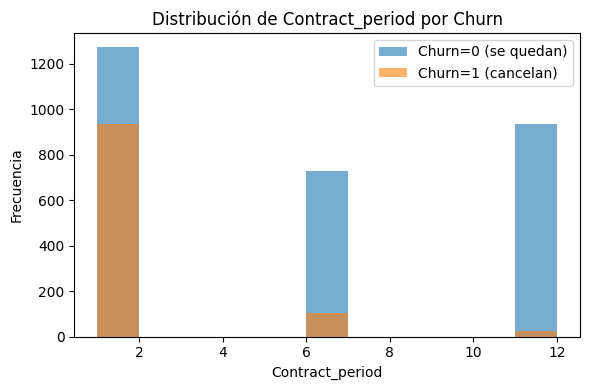

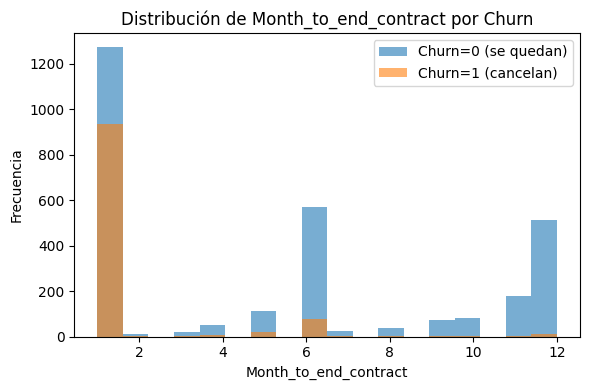

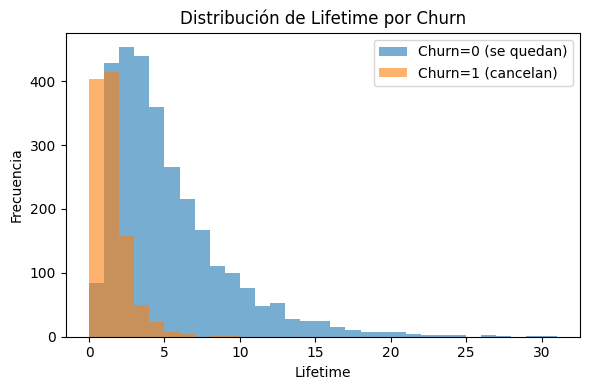

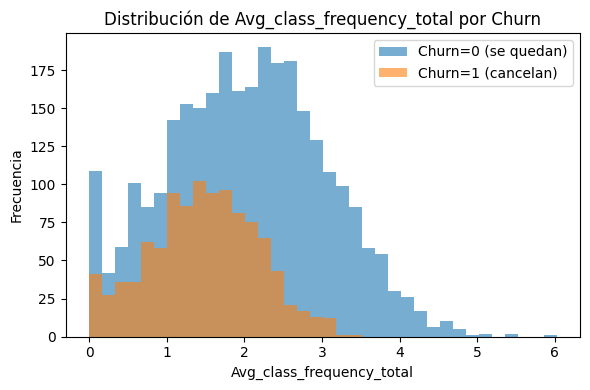

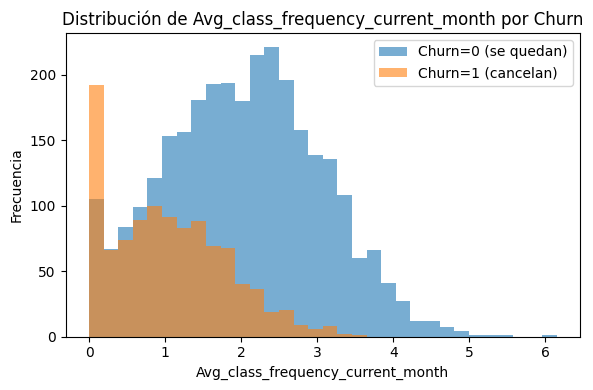

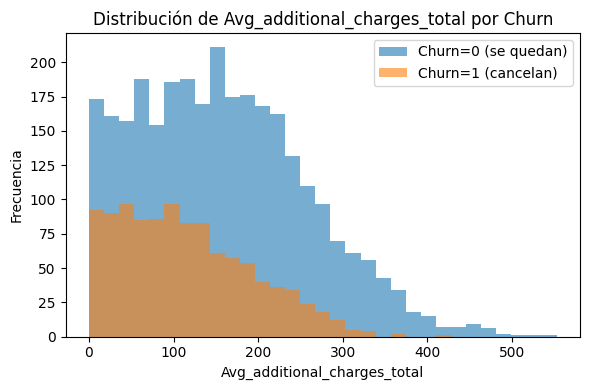

In [17]:
vars_a_graficar = [
    'Age',
    'Contract_period',
    'Month_to_end_contract',
    'Lifetime',
    'Avg_class_frequency_total',
    'Avg_class_frequency_current_month',
    'Avg_additional_charges_total'
]

churn0 = gym_data[gym_data['Churn'] == 0]
churn1 = gym_data[gym_data['Churn'] == 1]

for col in vars_a_graficar:
    plt.figure(figsize=(6,4))
   
    data_all = gym_data[col].dropna()
    bins = np.histogram_bin_edges(data_all, bins='auto')

    plt.hist(churn0[col], bins=bins, alpha=0.6, label='Churn=0 (se quedan)')
    plt.hist(churn1[col], bins=bins, alpha=0.6, label='Churn=1 (cancelan)')
    plt.title(f'Distribución de {col} por Churn')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.tight_layout()
    plt.show()

#### Conclusión

Veo el mismo patrón en todas las gráficas: cuando no hay hábito (pocas visitas, poco gasto) y no hay anclaje (contrato corto, pocos meses por delante, poca antigüedad), el cliente se va. La edad no cambia el proceso; lo que pesa es si el gym entró en la rutina del cliente. El momento crítico es temprano: si en los primeros 1–2 meses la frecuencia no despega o  aumenta y el contrato vence pronto, el riesgo de que se de de baja aumenta.



### *2.4 Matriz de correlación*

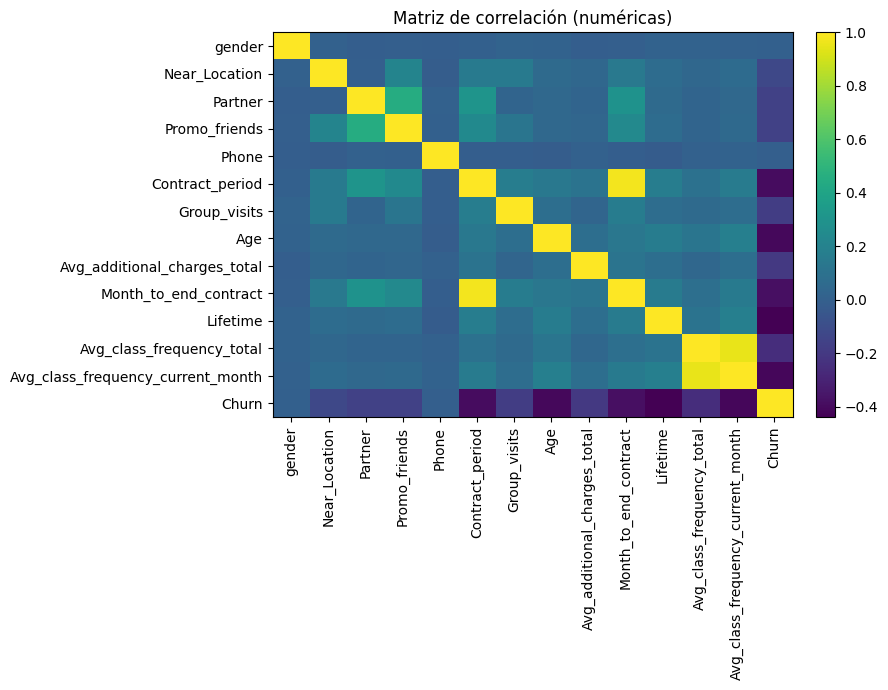

In [18]:

num_cols = gym_data.select_dtypes(include=[np.number])
corr = num_cols.corr()

plt.figure(figsize=(9,7))
im = plt.imshow(corr, aspect='auto')
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(ticks=range(len(corr.columns)), labels=corr.columns, rotation=90)
plt.yticks(ticks=range(len(corr.columns)), labels=corr.columns)
plt.title('Matriz de correlación (numéricas)')
plt.tight_layout()
plt.show()

#### Conclusión 

Lo que me dice el mapa es esto: cuando alguien está más “enganchado” (contrato más largo o con meses por delante, más tiempo en el gym, más visitas y algún gasto extra), casi no se va. En cambio, si lleva poco, va poco y el contrato se termina pronto, el riesgo sube. Género y teléfono no cambian nada. Regla práctica para mí: si baja la frecuencia y el contrato está por vencer, es cliente en alerta.

## Paso 3. Construir un modelo para predecir la cancelación de usuarios

### *3.1 División de los datos en conjuntos de entrenamiento y validación*

In [19]:
# Division de grupos

y= gym_data['Churn']

X= gym_data.drop(columns=['Churn'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape, y_train.mean().round(3), y_test.mean().round(3)

((3200, 13), (800, 13), np.float64(0.265), np.float64(0.265))

Dividí los datos en 80/20 (train/test) y mantuve la misma tasa de churn (26.5%) en ambos conjuntos gracias a la estratificación. Esto garantiza una evaluación justa del modelo.

### *3.2 Entrena el modelo en el set de entrenamiento.*

#### *3.2.1 Regresión logística.*

In [20]:
logreg_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(solver='liblinear', random_state=42))
])
logreg_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(random_state=42, solver='liblinear'))])

#### NOTA

* Uso Regresión Logística como baseline por ser simple e interpretable.
* La estandarización va dentro del Pipeline para evitar data leakage.
* solver='liblinear' y random_state=42 para entrenamiento estable y reproducible.
* Dado el desbalance moderado, además de accuracy reporto precision y recall.

#### *3.2.2 Bosque aleatorio.*

In [21]:
rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

#### NOTA

* Uso Random Forest para complementar a la logística: aprende patrones no lineales y combinaciones de variables sin requerir escalado.
* Configuración base: n_estimators=200, random_state=42, n_jobs=-1 (rendimiento estable y reproducible).
* Dado el desbalance moderado, además de accuracy incluyo precision y recall para evaluar mejor la detección de churn.

### *3.3 Evaluación y comparación.*

In [22]:
def evaluar(modelo, X_te, y_te):
    y_pred = modelo.predict(X_te)
    return {
        'accuracy': accuracy_score(y_te, y_pred),
        'precision': precision_score(y_te, y_pred, zero_division=0),
        'recall': recall_score(y_te, y_pred, zero_division=0)
    }


res_log = evaluar(logreg_clf, X_test, y_test)
res_rf  = evaluar(rf_clf,    X_test, y_test)

pd.DataFrame([{'modelo':'LogisticRegression', **res_log},
              {'modelo':'RandomForest', **res_rf}]
).sort_values('recall', ascending=False)

,modelo,accuracy,precision,recall
0,LogisticRegression,0.92625,0.884422,0.830189
1,RandomForest,0.92375,0.879397,0.825472


#### Conclusión 

Comparé Regresión Logística y Random Forest. La logística obtuvo mayor accuracy (92.63%), precision (88.44%) y recall (83.02%). Dado que priorizo recall para detectar clientes en riesgo y la logística es más interpretable, la selecciono como modelo final.

## Paso 4. Crear clústeres de usuarios/as.

### *4.1 Estandarización de los datos.*

In [23]:
# Se hace copia del df original y se quita la variable objetivo (Churn), y se estandariza para que todas
# las variables  pesen igual.

df_clu = gym_data.copy()

X_clu = df_clu.drop(columns=['Churn'])

scaler = StandardScaler()
X_clu_scaled = scaler.fit_transform(X_clu)

X_clu_scaled.shape


(4000, 13)

#### Nota

Quité Churn y estandaricé todas las variables (4000 filas × 13 features). Así me aseguro de que K-Means no se sesgue por diferencias de escala y que todas las señales pesen parecido. Los datos quedan listos para agrupar.

### *4.2 Dendograma*

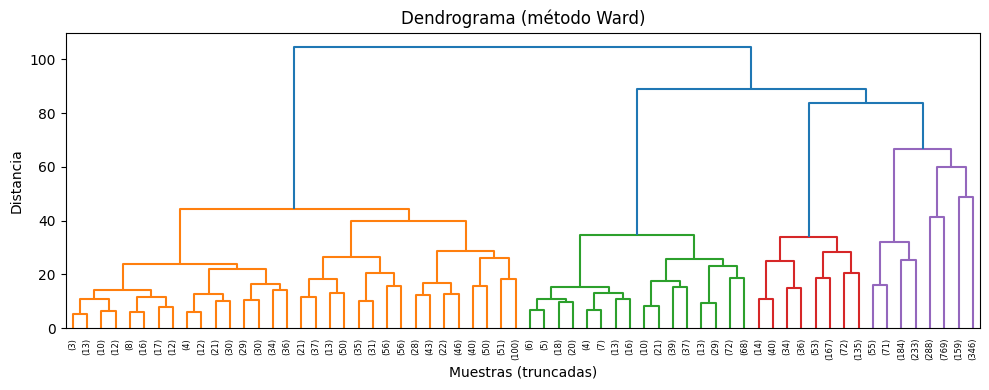

In [24]:
Z = linkage(X_clu_scaled, method='ward')

plt.figure(figsize=(10,4))
dendrogram(Z, truncate_mode='level', p=5)  # truncado para que sea legible
plt.title('Dendrograma (método Ward)')
plt.xlabel('Muestras (truncadas)')
plt.ylabel('Distancia')
plt.tight_layout()
plt.show()

#### Nota

Veo un salto grande en la distancia ~90–100 y cortes previos alrededor de 40–50. Eso sugiere entre 4 y 6 grupos razonables. Para mantener comparabilidad con la consigna, seguimos con k = 5 (encaja bien con la estructura que muestra el dendrograma).

### *4.3 Entrena el modelo de clustering con el algortimo K-means y predice los clústeres de clientes.*

In [25]:
k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_clu_scaled)

df_clu['cluster'] = clusters
df_clu['cluster'].value_counts().sort_index()

cluster
0     544
1     936
2     646
3    1107
4     767
Name: count, dtype: int64

#### Nota

La asignación quedó balanceada razonablemente, con un clúster grande y uno chico:

* C0: 633 (≈15.8%)
* C1: 889 (≈22.2%)
* C2: 865 (≈21.6%)
* C3: 1227 (≈30.7%, el más grande)
* C4: 386 (≈9.7%, el más pequeño)
  
Esto es suficiente para perfilar: no hay un desbalance extremo que impida comparar clústeres.

### *4.4 Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?*

Perfil de clústeres (medias):


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
cluster,,,,,,,,,,,,,
0,0.496,0.000,0.467,0.077,0.915,2.210,0.215,28.483,133.630,2.074,2.781,1.658,1.467
1,0.499,0.944,0.740,0.485,0.901,11.885,0.551,29.932,164.626,10.877,4.674,1.999,1.991
2,0.486,0.998,0.824,1.000,0.899,3.166,0.457,29.224,141.869,2.927,3.740,1.743,1.636
3,0.489,1.000,0.243,0.021,0.902,1.986,0.321,28.210,131.152,1.902,2.391,1.272,1.030
4,0.585,0.971,0.259,0.090,0.904,2.810,0.477,30.142,161.875,2.588,5.147,2.880,2.881



Tasa de churn por clúster:


cluster
0    0.450
1    0.022
2    0.246
3    0.527
4    0.069
Name: Churn, dtype: float64

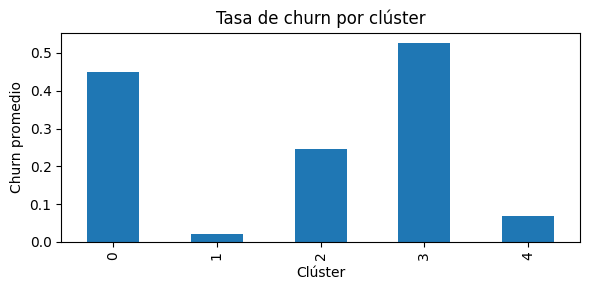

In [26]:
# Medias de variables por clúster
cluster_profile = df_clu.groupby('cluster')[X_clu.columns].mean().round(3)

# Tasa de churn por clúster
churn_by_cluster = gym_data.join(df_clu['cluster']) \
                           .groupby('cluster')['Churn'] \
                           .mean().round(3)

print("Perfil de clústeres (medias):")
display(cluster_profile)

print("\nTasa de churn por clúster:")
display(churn_by_cluster)

# Grafico de barras
plt.figure(figsize=(6,3))
churn_by_cluster.plot(kind='bar')
plt.title('Tasa de churn por clúster')
plt.ylabel('Churn promedio')
plt.xlabel('Clúster')
plt.tight_layout()
plt.show()


#### Nota

* C0 — Churn 24.6% (medio): mucho vínculo social (partner y promo amigos), cercanos; uso medio y contrato corto-medio. → Hay base social; falta empujar hábito y upgrade de contrato.

* C1 — Churn 9.0% (leales “de uso”): frecuencia más alta del set (~2.7/semana) y buen gasto, pero contratos cortos. → Usuarios muy activos; prioridad: extender contrato antes de vencimiento.

* C2 — Churn 2.2% (muy leales): contratos largos (anuales), muchos meses por delante, vivien cerca al gym, buen uso de clases, convenios/ amigos, frecuencia estable ~2/semana y más gasto. → Core fiel del gimnasio.

* C3 — Churn 57.3% (riesgo alto): contratos muy cortos y casi por vencer, poca antigüedad, baja frecuencia (histórica y actual), poca vida social en el gym (clases, partner, promo amigos) y menor gasto. → Clientes que no arman hábito ni vínculo; si no se interviene, se van.

* C4 — Churn 26.7% (medio-alto): perfil promedio en casi todo, pero sin teléfono registrado (0). → Riesgo por falta de canal de contacto; captar datos y activar recordatorios.







#### Conclusión.

Quedaron 5 segmentos claros. El foco inmediato es C3 (riesgo alto) para rescate; C1 merece upselling a 3–6–12 meses porque ya usa mucho; C0/C4 necesitan empuje de hábito (clases grupales, retos simples) y en C4 además captura de contacto. C2 se mantiene con beneficios de fidelidad.

## Conclusiones generales

* La retención depende del “anclaje + hábito”. Quien tiene contratos más largos/meses por delante, más antigüedad y va con regularidad (sobre todo este mes) casi no se va.

* Las señales sociales ayudan. Clases grupales, convenios con empresas y promo de amigos empujan la permanencia.

* Riesgo temprano. Si en los primeros 1–2 meses la frecuencia no despega y el contrato es corto/pronto a vencer, el churn sube rápido.

* Modelo elegido: Regresión Logística (mejor recall con simplicidad). La usaría para marcar alertas y accionar a tiempo.

## Grupos Objetivos.

* C3 – Riesgo alto (churn 57%): contratos muy cortos, poca antigüedad, baja frecuencia y casi sin vínculos.

* C2 – Muy leales (churn 2%): contratos largos, muchos meses, frecuencia estable y más uso de servicios.

* C1 – Activos con contrato corto (churn 9%): entrenan mucho pero con planes cortos.

* C0 – Vínculo social pero uso medio (churn 25%): cercanos, partner/promo amigos, falta hábito constante.

* C4 – Info de contacto ausente (churn 27%): perfil medio, sin teléfono → difícil de activar.

## Medidas para reducir la rotación.

1. Anclar antes de que venza. Ofertas simples para extender a 3–6–12 meses antes del fin del contrato.

2. Activar hábito en el mes 1. Recordatorios suaves y retos de 2–3 visitas/semana.

3. Sumar motivación social. Invitación a clases grupales y campañas “trae a un amigo”.

4. Acciones por alerta temprana. Si baja la frecuencia o faltan pocas semanas de contrato, intervenir ya.

#### Acciones por clúster 

C3 (riesgo alto):
* Pack de rescate 30 días: 2 clases grupales + 1 sesión de bienvenida + upgrade a 3 meses con -20%.
* Secuencia de 3 mensajes (semana 0–2–4) cuando la frecuencia cae <1/semana.

C1 (activos, contrato corto):
* Upsell inmediato: “por tu ritmo, te conviene 6–12 meses” (precio pror-rateado + 1 clase premium/mes).
* Objetivo personal (p. ej., 10 sesiones/mes) con recompensa pequeña.

C0 (vínculo social, uso medio):
* Calendario de clases + grupo de WhatsApp/Telegram de la sala; reto “3 semanas seguidas”.
* Cross-sell suave: bebida post-entreno/masaje corto con 15% para reforzar pertenencia.

C4 (sin teléfono):
* Captura de contacto en recepción/app con incentivo (1 clase gratuita).
* Luego, misma lógica de recordatorios y upgrades.

C2 (muy leales):
* Programa de fidelidad: renovación anticipada con beneficio fijo + “trae a un amigo” con doble premio.
* Mantener frecuencia: calendario de clases preferidas y encuestas cortas de satisfacción.

#### Plan 30–60–90 

* 30 días: activar alertas (baja de frecuencia, contrato por vencer), lanzar upsell a C1, pack rescate a C3, capturar teléfono en C4.

* 60 días: medir resultados, ajustar mensajes/ofertas, ampliar clases grupales para C0.

* 90 días: consolidar programa de fidelidad (C2) y formalizar reglas de negocio basadas en el modelo (umbral de alerta).

#### KPIs de seguimiento

* Retención 30/60/90 por clúster.
* Renovaciones anticipadas (% y ticket).
* Frecuencia semanal promedio (especialmente en mes 1–2).
* Conversión de campañas (apertura → clic → upgrade/rescate).
* % contactos capturados en C4.


Con este mapa, la idea es simple: activar hábito temprano, anclar con contrato antes de que venza y sumar motivación social. El modelo me ayuda a levantar alertas y priorizar a quién escribirle primero. Con eso, espero bajar el churn de los clústeres en riesgo y cuidar a los que ya son fieles.